In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# 데이터 입력 (mm 단위로 변환)
import pandas as pd

df = pd.read_excel('Bench.xlsx',sheet_name='C_PDO')
df

,vertical,-0.0089,-0.006675,-0.00445,-0.002225,0,0.002225,0.00445,0.006675,0.0089
0,0.000000,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
1,0.008316,0.080199,0.086493,0.093985,0.100845,0.103602,0.100845,0.093985,0.086493,0.080199
2,0.016632,0.153135,0.172017,0.194113,0.213498,0.221066,0.213498,0.194113,0.172017,0.153135
3,0.024948,0.218846,0.249234,0.282691,0.310144,0.320475,0.310144,0.282691,0.249234,0.218846
4,0.033264,0.277866,0.316397,0.356220,0.387093,0.398391,0.387093,0.356220,0.316397,0.277866
5,0.041580,0.330887,0.374488,0.417173,0.448855,0.460219,0.448855,0.417173,0.374488,0.330887
6,0.049896,0.378604,0.424972,0.468392,0.499566,0.510587,0.499566,0.468392,0.424972,0.378604
7,0.058212,0.421659,0.469171,0.512077,0.542098,0.552595,0.542098,0.512077,0.469171,0.421659
8,0.066528,0.460620,0.508161,0.549832,0.578397,0.588300,0.578397,0.549832,0.508161,0.460620
9,0.074844,0.495980,0.542795,0.582828,0.609815,0.619107,0.609815,0.582828,0.542795,0.495980


In [2]:
vertical = df['vertical'].to_numpy()
horizontal = pd.Series(df.columns[1:].astype(float)).to_numpy()
# df의 각 열(온도 데이터)을 meshgrid 형태로 변환
temperature = df.iloc[:, 1:].to_numpy()

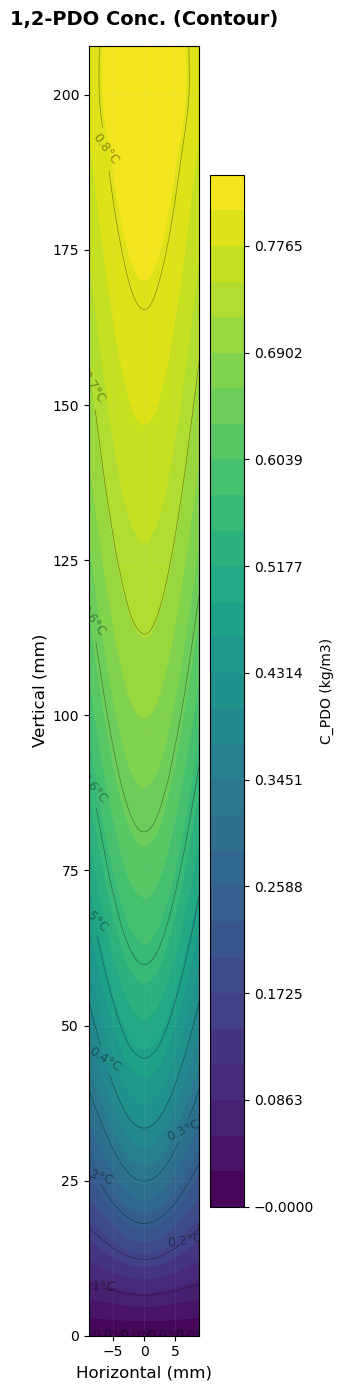

In [3]:
# vertical, horizontal, temperature 변수에 맞게 코드 수정
# 단위가 m이므로 mm로 변환 (1000 곱하기)
vertical_mm = vertical * 1000
horizontal_mm = horizontal * 1000

# 메쉬그리드 생성 (horizontal: x축, vertical: y축, 단위 mm)
X, Y = np.meshgrid(horizontal_mm, vertical_mm)

# 고해상도 보간용 그리드 생성 (단위 mm)
horizontal_fine = np.linspace(horizontal_mm.min(), horizontal_mm.max(), 200)
vertical_fine = np.linspace(vertical_mm.min(), vertical_mm.max(), 500)
X_fine, Y_fine = np.meshgrid(horizontal_fine, vertical_fine)

# 원본 데이터 포인트 (각 위치에 대한 온도값, 단위 mm)
points = np.array([(x, y) for y in vertical_mm for x in horizontal_mm])
values = temperature.flatten()

# cubic 보간으로 부드러운 온도 데이터 생성
temperature_fine = griddata(points, values, (X_fine, Y_fine), method='cubic')

# 플롯 생성 (세로로 긴 반응기 형상)
fig, ax = plt.subplots(figsize=(6, 14))

# 등고선 플롯
levels = np.linspace(np.nanmin(temperature_fine), np.nanmax(temperature_fine), 30)
contourf = ax.contourf(X_fine, Y_fine, temperature_fine, levels=levels, cmap='viridis')
contour = ax.contour(X_fine, Y_fine, temperature_fine, levels=12, colors='black', 
                    linewidths=0.5, alpha=0.4)
ax.clabel(contour, inline=True, fontsize=9, fmt='%.1f°C')

ax.set_xlabel('Horizontal (mm)', fontsize=12)
ax.set_ylabel('Vertical (mm)', fontsize=12)
ax.set_title('1,2-PDO Conc. (Contour)', fontsize=14, fontweight='bold', pad=15)
ax.set_aspect('equal')

# 컬러바 추가
cbar = plt.colorbar(contourf, ax=ax, label='C_PDO (kg/m3)', pad=0.02, shrink=0.8, aspect=30)
cbar.ax.tick_params(labelsize=10)

# 그리드 추가
ax.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [4]:
# 그래프를 파일로 저장 (예: 'temperature_contour.png')
fig.savefig('PDO_contour.png', dpi=300, bbox_inches='tight')
